In [69]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
os.chdir("D:\Imarticus\ML\Covid 19")

In [3]:
os.listdir()

['Covid.csv', 'covid19_sample.csv', 'data_dictionary_covid_cases_public.xlsx']

In [4]:
df=pd.read_csv("covid19_sample.csv")

In [5]:
df.head()

,Unnamed: 0,cdc_report_dt,pos_spec_dt,onset_dt,current_status,sex,age_group,Race and ethnicity (combined),hosp_yn,icu_yn,death_yn,medcond_yn
0,3517780,2020/07/22,NaN,NaN,Laboratory-confirmed case,Female,70 - 79 Years,"White, Non-Hispanic",Yes,Missing,Yes,Missing
1,3679793,2020/08/07,2020/08/04,NaN,Laboratory-confirmed case,Female,80+ Years,"White, Non-Hispanic",Yes,Unknown,Yes,Missing
2,3331587,2020/03/31,NaN,NaN,Laboratory-confirmed case,Male,70 - 79 Years,"White, Non-Hispanic",Yes,No,Yes,Yes
3,3680266,2020/08/11,2020/08/05,NaN,Laboratory-confirmed case,Female,80+ Years,"Black, Non-Hispanic",Yes,Unknown,Yes,Yes
4,6264234,2020/04/18,NaN,NaN,Probable Case,Female,50 - 59 Years,"Asian, Non-Hispanic",Unknown,Unknown,Yes,Unknown


In [6]:
df.shape

(184155, 12)

In [7]:
df.drop(columns=['Unnamed: 0'],inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184155 entries, 0 to 184154
Data columns (total 11 columns):
 #   Column                         Non-Null Count   Dtype 
---  ------                         --------------   ----- 
 0   cdc_report_dt                  184155 non-null  object
 1   pos_spec_dt                    67144 non-null   object
 2   onset_dt                       118445 non-null  object
 3   current_status                 184155 non-null  object
 4   sex                            184154 non-null  object
 5   age_group                      184151 non-null  object
 6   Race and ethnicity (combined)  184154 non-null  object
 7   hosp_yn                        184155 non-null  object
 8   icu_yn                         184155 non-null  object
 9   death_yn                       184155 non-null  object
 10  medcond_yn                     184155 non-null  object
dtypes: object(11)
memory usage: 15.5+ MB


### EDA

In [9]:
df.describe().T

,count,unique,top,freq
cdc_report_dt,184155,287,2020/06/10,8553
pos_spec_dt,67144,278,2020/11/09,834
onset_dt,118445,314,2020/11/03,813
current_status,184155,2,Laboratory-confirmed case,173359
sex,184154,5,Female,92108
age_group,184151,10,80+ Years,37917
Race and ethnicity (combined),184154,9,"White, Non-Hispanic",75938
hosp_yn,184155,4,No,91217
icu_yn,184155,4,Missing,103731
death_yn,184155,2,No,110724


In [10]:
df['medcond_yn'].value_counts(dropna=False)

Missing    101496
Yes         42408
Unknown     21830
No          18421
Name: medcond_yn, dtype: int64

In [11]:
df['medcond_yn']=df['medcond_yn'].replace(['Missing'],'Unknown')

In [12]:
df['death_yn'].value_counts(dropna=False)

No     110724
Yes     73431
Name: death_yn, dtype: int64

In [13]:
df['death_yn']=df['death_yn'].map({'Yes':1,'No':0})

In [14]:
df['icu_yn'].value_counts(dropna=False)

Missing    103731
Unknown     42300
No          27584
Yes         10540
Name: icu_yn, dtype: int64

In [15]:
df['icu_yn']=df['icu_yn'].replace(['Missing'],'Unknown')

In [16]:
df['hosp_yn'].value_counts(dropna=False)

No         91217
Yes        53384
Unknown    20043
Missing    19511
Name: hosp_yn, dtype: int64

In [17]:
df['hosp_yn']=df['hosp_yn'].replace(['Missing'],'Unknown')

In [18]:
df['Race and ethnicity (combined)'].value_counts(dropna=False)

White, Non-Hispanic                                     75938
Unknown                                                 39585
Hispanic/Latino                                         26330
Black, Non-Hispanic                                     22485
Multiple/Other, Non-Hispanic                             6902
Missing                                                  6789
Asian, Non-Hispanic                                      4581
American Indian/Alaska Native, Non-Hispanic              1100
Native Hawaiian/Other Pacific Islander, Non-Hispanic      444
NaN                                                         1
Name: Race and ethnicity (combined), dtype: int64

In [19]:
df.rename(columns={'Race and ethnicity (combined)': 'Race_enthnicity'},inplace=True)

In [20]:
df['Race_enthnicity']=df['Race_enthnicity'].replace(['Missing'],'Unknown')

In [21]:
df['Race_enthnicity']=df['Race_enthnicity'].fillna('Unknown')

In [22]:
df['age_group'].value_counts(dropna=False)

80+ Years        37917
70 - 79 Years    24085
60 - 69 Years    23112
20 - 29 Years    22170
50 - 59 Years    21916
30 - 39 Years    19374
40 - 49 Years    19255
10 - 19 Years    11770
0 - 9 Years       4413
Unknown            139
NaN                  4
Name: age_group, dtype: int64

In [23]:
df['age_group']=df['age_group'].map({'0 - 9 Years':'0 - 19 Years',
                                       '10 - 19 Years':'0 - 19 Years',
                                       '20 - 29 Years':'20 - 39 Years',
                                       '30 - 39 Years':'20 - 39 Years',
                                       '40 - 49 Years':'40 - 59 Years',
                                       '50 - 59 Years':'40 - 59 Years',
                                       '60 - 69 Years':'60+ Years',
                                       '70 - 79 Years':'60+ Years',
                                       '80+ Years':'60+ Years',
                                       'Unknown':'Unknown'})

In [24]:
df['age_group']=df['age_group'].fillna('Unknown')

In [25]:
df['sex'].value_counts(dropna=False)

Female     92108
Male       91269
Unknown      537
Missing      238
Other          2
NaN            1
Name: sex, dtype: int64

In [26]:
df['sex']=df['sex'].replace(['Missing','Other'],'Unknown')

In [27]:
df['sex']=df['sex'].fillna('Unknown')

In [28]:
df['current_status'].value_counts(dropna=False)

Laboratory-confirmed case    173359
Probable Case                 10796
Name: current_status, dtype: int64

In [29]:
df.drop(columns=['pos_spec_dt','onset_dt'],inplace=True)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184155 entries, 0 to 184154
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   cdc_report_dt    184155 non-null  object
 1   current_status   184155 non-null  object
 2   sex              184155 non-null  object
 3   age_group        184155 non-null  object
 4   Race_enthnicity  184155 non-null  object
 5   hosp_yn          184155 non-null  object
 6   icu_yn           184155 non-null  object
 7   death_yn         184155 non-null  int64 
 8   medcond_yn       184155 non-null  object
dtypes: int64(1), object(8)
memory usage: 12.6+ MB


In [31]:
def date_format(data, x:str):
    x_type=data[x].dtype
    if isinstance(x_type, pd.core.dtypes.dtypes.DatetimeTZDtype):
        x_type=np.datetime64
    if not np.issubdtype(x_type,np.datetime64):
        data[x]=pd.to_datetime(data[x], infer_datetime_format=True)

In [32]:
date_format(data=df,x='cdc_report_dt')

In [33]:
df['cdc_report_dt'].dtypes

dtype('<M8[ns]')

In [34]:
df['quarter']=df['cdc_report_dt'].dt.quarter   # df['quarter']=df['cdc_report_dt'].dt.to_period('Q')
df['month']=df['cdc_report_dt'].dt.month
df['day']=df['cdc_report_dt'].dt.day
df['day_of_week']=df['cdc_report_dt'].dt.dayofweek

In [35]:
def mnth_cat(x):
    if x<=10:
        return "starting_of_month"
    elif x>10 and x<=20:
        return "mid_of_month"
    else:
        return "end_of_month"

In [36]:
df['month_cat']=df['day'].apply(mnth_cat)

In [37]:
df['day_of_week'].value_counts()

2    37372
1    29241
0    27831
3    24210
6    22150
4    21904
5    21447
Name: day_of_week, dtype: int64

In [38]:
def day_cat(x):
    if x <= 4:
        return "weekday"
    else:
        return "weekend"

In [39]:
df['day_cat']=df['day_of_week'].apply(lambda a : day_cat(a))

In [40]:
df['day_cat'].value_counts()

weekday    140558
weekend     43597
Name: day_cat, dtype: int64

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184155 entries, 0 to 184154
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   cdc_report_dt    184155 non-null  datetime64[ns]
 1   current_status   184155 non-null  object        
 2   sex              184155 non-null  object        
 3   age_group        184155 non-null  object        
 4   Race_enthnicity  184155 non-null  object        
 5   hosp_yn          184155 non-null  object        
 6   icu_yn           184155 non-null  object        
 7   death_yn         184155 non-null  int64         
 8   medcond_yn       184155 non-null  object        
 9   quarter          184155 non-null  int64         
 10  month            184155 non-null  int64         
 11  day              184155 non-null  int64         
 12  day_of_week      184155 non-null  int64         
 13  month_cat        184155 non-null  object        
 14  day_cat          184

In [42]:
def univariate_cat(data,x):
    missing=data[x].isnull().sum()
    unique_cnt=data[x].nunique()
    unique_cat=list(data[x].unique())
    
    f1=pd.DataFrame(data[x].value_counts(dropna=False))
    f1.rename(columns={x:"Count"},inplace=True)
    f2=pd.DataFrame(data[x].value_counts(normalize=True))
    f2.rename(columns={x:"Percentage"},inplace=True)
    f2["Percentage"]=(f2["Percentage"]*100).round(2).astype(str)+" %"
    ff=pd.concat([f1,f2],axis=1)
    
    print(f"Total missing values : {missing}\n")
    print(f"Total count of unique category : {unique_cnt}\n")
    print(f"Unique categories : \n{unique_cat}")
    print(f"Value count and % : \n{ff}")

In [43]:
univariate_cat(df,'death_yn')

Total missing values : 0

Total count of unique category : 2

Unique categories : 
[1, 0]
Value count and % : 
    Count Percentage
0  110724    60.13 %
1   73431    39.87 %


In [44]:
univariate_cat(df,'icu_yn')

Total missing values : 0

Total count of unique category : 3

Unique categories : 
['Unknown', 'No', 'Yes']
Value count and % : 
          Count Percentage
Unknown  146031     79.3 %
No        27584    14.98 %
Yes       10540     5.72 %


<AxesSubplot:xlabel='icu_yn', ylabel='count'>

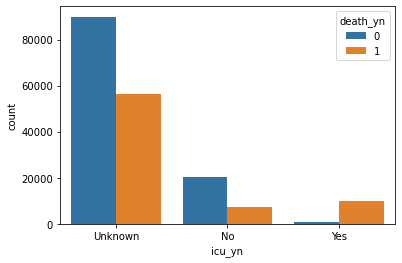

In [45]:
sns.countplot(data=df,x='icu_yn',hue='death_yn')

In [46]:
df.drop(columns=['cdc_report_dt'],inplace=True)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184155 entries, 0 to 184154
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   current_status   184155 non-null  object
 1   sex              184155 non-null  object
 2   age_group        184155 non-null  object
 3   Race_enthnicity  184155 non-null  object
 4   hosp_yn          184155 non-null  object
 5   icu_yn           184155 non-null  object
 6   death_yn         184155 non-null  int64 
 7   medcond_yn       184155 non-null  object
 8   quarter          184155 non-null  int64 
 9   month            184155 non-null  int64 
 10  day              184155 non-null  int64 
 11  day_of_week      184155 non-null  int64 
 12  month_cat        184155 non-null  object
 13  day_cat          184155 non-null  object
dtypes: int64(5), object(9)
memory usage: 19.7+ MB


### Missing Value Treatment

In [48]:
df.isnull().sum()

current_status     0
sex                0
age_group          0
Race_enthnicity    0
hosp_yn            0
icu_yn             0
death_yn           0
medcond_yn         0
quarter            0
month              0
day                0
day_of_week        0
month_cat          0
day_cat            0
dtype: int64

#### Outliers

<AxesSubplot:xlabel='month'>

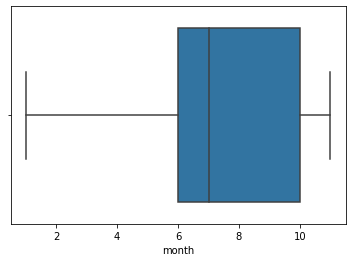

In [49]:
sns.boxplot(data=df,x='month')

In [50]:
df.describe(percentiles=[.01,.02,.03,.04,.05,.25,.5,.75,.9,.95,.96,.97,.98,.99]).T

,count,mean,std,min,1%,2%,3%,4%,5%,25%,50%,75%,90%,95%,96%,97%,98%,99%,max
death_yn,184155.0,0.398746,0.489642,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
quarter,184155.0,2.845505,0.854620,1.0,1.0,1.0,2.0,2.0,2.0,2.0,3.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0
month,184155.0,7.447623,2.400948,1.0,3.0,3.0,4.0,4.0,4.0,6.0,7.0,10.0,11.0,11.0,11.0,11.0,11.0,11.0,11.0
day,184155.0,15.744965,8.478379,1.0,1.0,1.0,2.0,2.0,2.0,9.0,16.0,23.0,28.0,29.0,30.0,30.0,30.0,31.0,31.0
day_of_week,184155.0,2.738812,1.948675,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,4.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0


* There is not outlier in this data

### Dummy Creation

In [51]:
df.dtypes[df.dtypes=='object']

current_status     object
sex                object
age_group          object
Race_enthnicity    object
hosp_yn            object
icu_yn             object
medcond_yn         object
month_cat          object
day_cat            object
dtype: object

In [52]:
df=pd.get_dummies(data=df, drop_first=True)

In [53]:
df.columns

Index(['death_yn', 'quarter', 'month', 'day', 'day_of_week',
       'current_status_Probable Case', 'sex_Male', 'sex_Unknown',
       'age_group_20 - 39 Years', 'age_group_40 - 59 Years',
       'age_group_60+ Years', 'age_group_Unknown',
       'Race_enthnicity_Asian, Non-Hispanic',
       'Race_enthnicity_Black, Non-Hispanic',
       'Race_enthnicity_Hispanic/Latino',
       'Race_enthnicity_Multiple/Other, Non-Hispanic',
       'Race_enthnicity_Native Hawaiian/Other Pacific Islander, Non-Hispanic',
       'Race_enthnicity_Unknown', 'Race_enthnicity_White, Non-Hispanic',
       'hosp_yn_Unknown', 'hosp_yn_Yes', 'icu_yn_Unknown', 'icu_yn_Yes',
       'medcond_yn_Unknown', 'medcond_yn_Yes', 'month_cat_mid_of_month',
       'month_cat_starting_of_month', 'day_cat_weekend'],
      dtype='object')

In [54]:
df.columns=df.columns.str.replace("[-, /]",'_')

C:\Users\ABHAY\AppData\Local\Temp\ipykernel_11000\4001130695.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df.columns=df.columns.str.replace("[-, /]",'_')


In [55]:
df.columns

Index(['death_yn', 'quarter', 'month', 'day', 'day_of_week',
       'current_status_Probable_Case', 'sex_Male', 'sex_Unknown',
       'age_group_20___39_Years', 'age_group_40___59_Years',
       'age_group_60+_Years', 'age_group_Unknown',
       'Race_enthnicity_Asian__Non_Hispanic',
       'Race_enthnicity_Black__Non_Hispanic',
       'Race_enthnicity_Hispanic_Latino',
       'Race_enthnicity_Multiple_Other__Non_Hispanic',
       'Race_enthnicity_Native_Hawaiian_Other_Pacific_Islander__Non_Hispanic',
       'Race_enthnicity_Unknown', 'Race_enthnicity_White__Non_Hispanic',
       'hosp_yn_Unknown', 'hosp_yn_Yes', 'icu_yn_Unknown', 'icu_yn_Yes',
       'medcond_yn_Unknown', 'medcond_yn_Yes', 'month_cat_mid_of_month',
       'month_cat_starting_of_month', 'day_cat_weekend'],
      dtype='object')

In [56]:
df.shape

(184155, 28)

### Multicolinearity

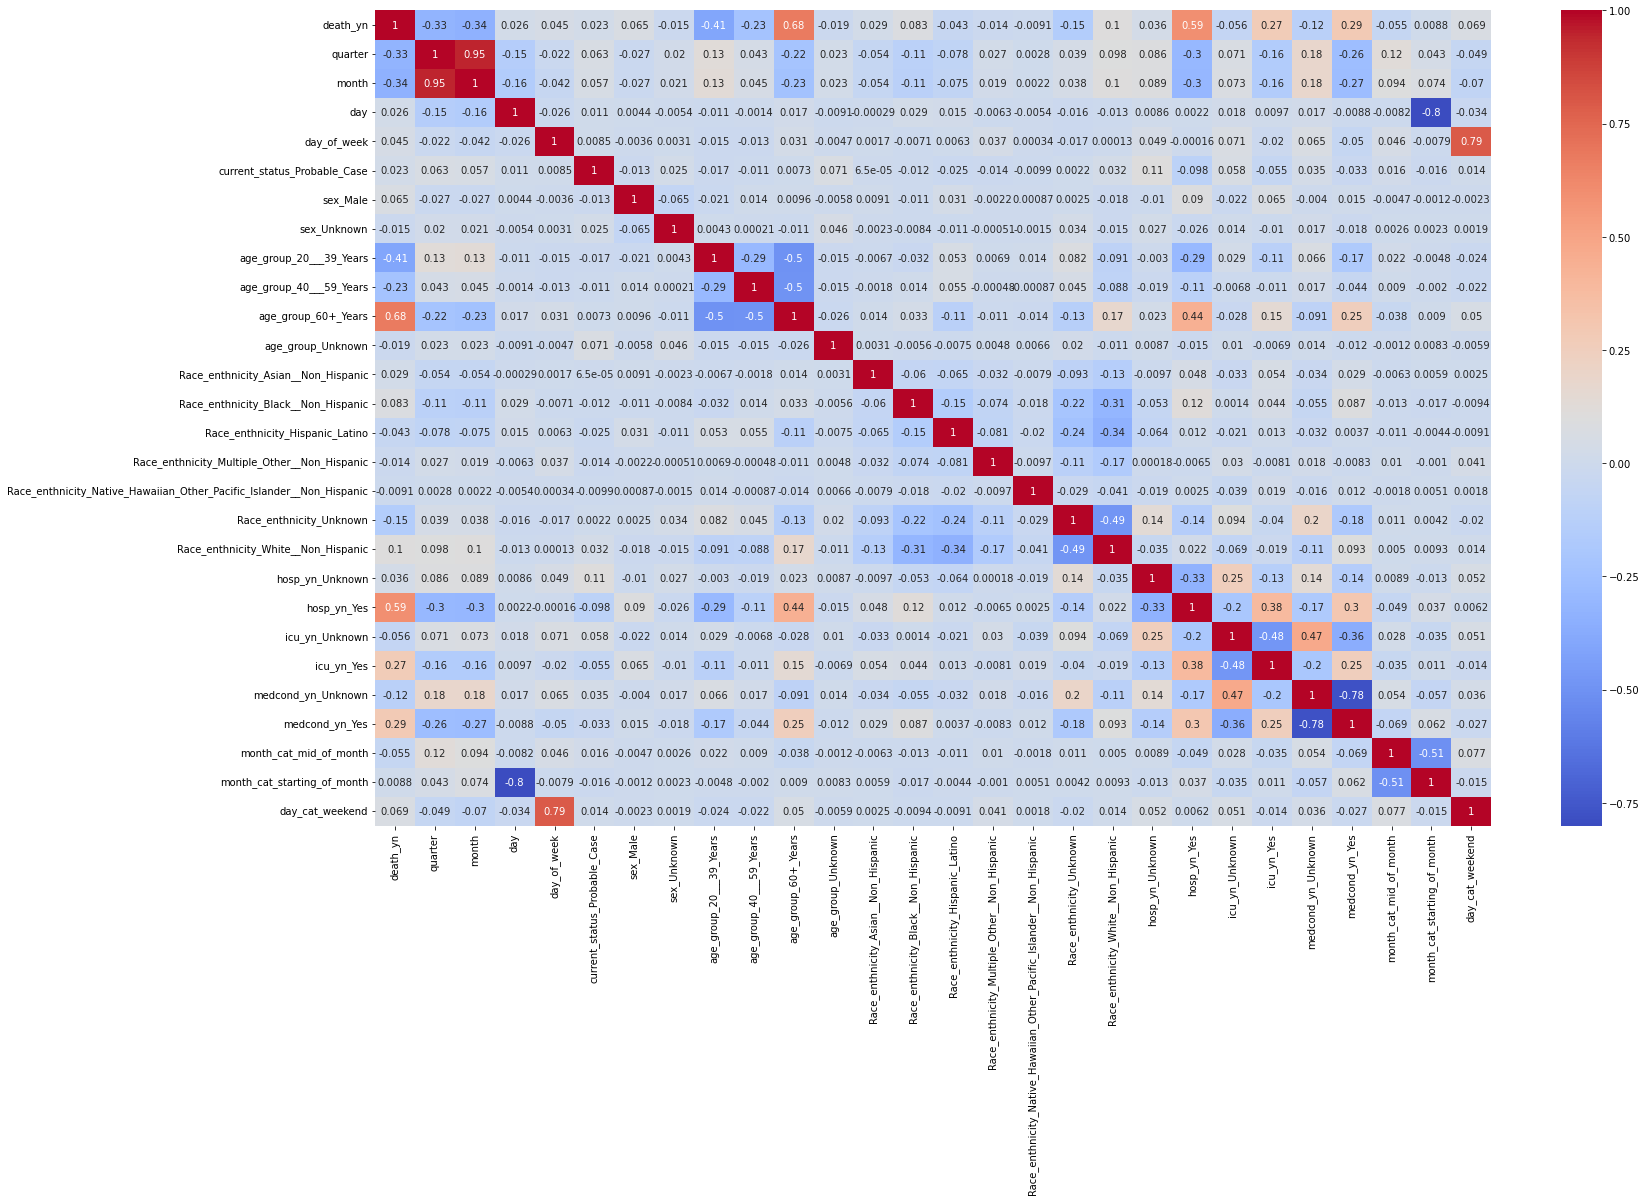

In [57]:
plt.figure(figsize=(25,15))
cr=df.corr()
sns.heatmap(data=cr, annot=True, cmap='coolwarm')
plt.show()

### Model Development

In [58]:
y=df['death_yn']
x=df.drop(columns=['death_yn'])

In [59]:
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=.3,random_state=0)

In [60]:
logR=LogisticRegression(max_iter=1000)
logR.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [61]:
print('Train Score : ', logR.score(x_train,y_train))
print('Test Score : ', logR.score(x_test,y_test))

Train Score :  0.8858488224159866
Test Score :  0.8871974948866002


In [62]:
pred_train=logR.predict(x_train)
pred_test=logR.predict(x_test)

### Cofusion Matrix

In [63]:
conf_train=metrics.confusion_matrix(y_train,pred_train)

In [64]:
pd.DataFrame(conf_train, columns=['Pred_0_neg','Pred_1_pos'], index=['Act_0_neg','Act_1_pos'])

,Pred_0_neg,Pred_1_pos
Act_0_neg,69591,7683
Act_1_pos,7032,44602


In [65]:
print(metrics.classification_report(y_train,pred_train))

              precision    recall  f1-score   support

           0       0.91      0.90      0.90     77274
           1       0.85      0.86      0.86     51634

    accuracy                           0.89    128908
   macro avg       0.88      0.88      0.88    128908
weighted avg       0.89      0.89      0.89    128908



In [66]:
prob_train=pd.DataFrame(logR.predict_proba(x_train),columns=['prob_0','prob_1'])
prob_train

,prob_0,prob_1
0,0.931059,0.068941
1,0.036987,0.963013
2,0.787930,0.212070
3,0.028047,0.971953
4,0.221730,0.778270
...,...,...
128903,0.993644,0.006356
128904,0.572244,0.427756
128905,0.994293,0.005707
128906,0.780941,0.219059


### ROC and AUC

In [67]:
fpr, tpr, thresholds=metrics.roc_curve(y_train,pred_train)
roc_auc=metrics.auc(fpr,tpr)    # AUC : Area under the curve
roc_auc

0.882192623080674

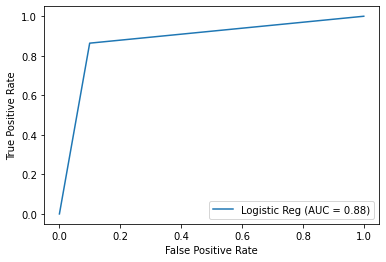

In [68]:
display=metrics.RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc, estimator_name='Logistic Reg')
display.plot()
plt.show()

## Decision Tree

In [71]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [72]:
print('Train Accuracy :',round(dt.score(x_train,y_train),3))
print('Test Accuracy :',round(dt.score(x_test,y_test),3))

Train Accuracy : 0.935
Test Accuracy : 0.873


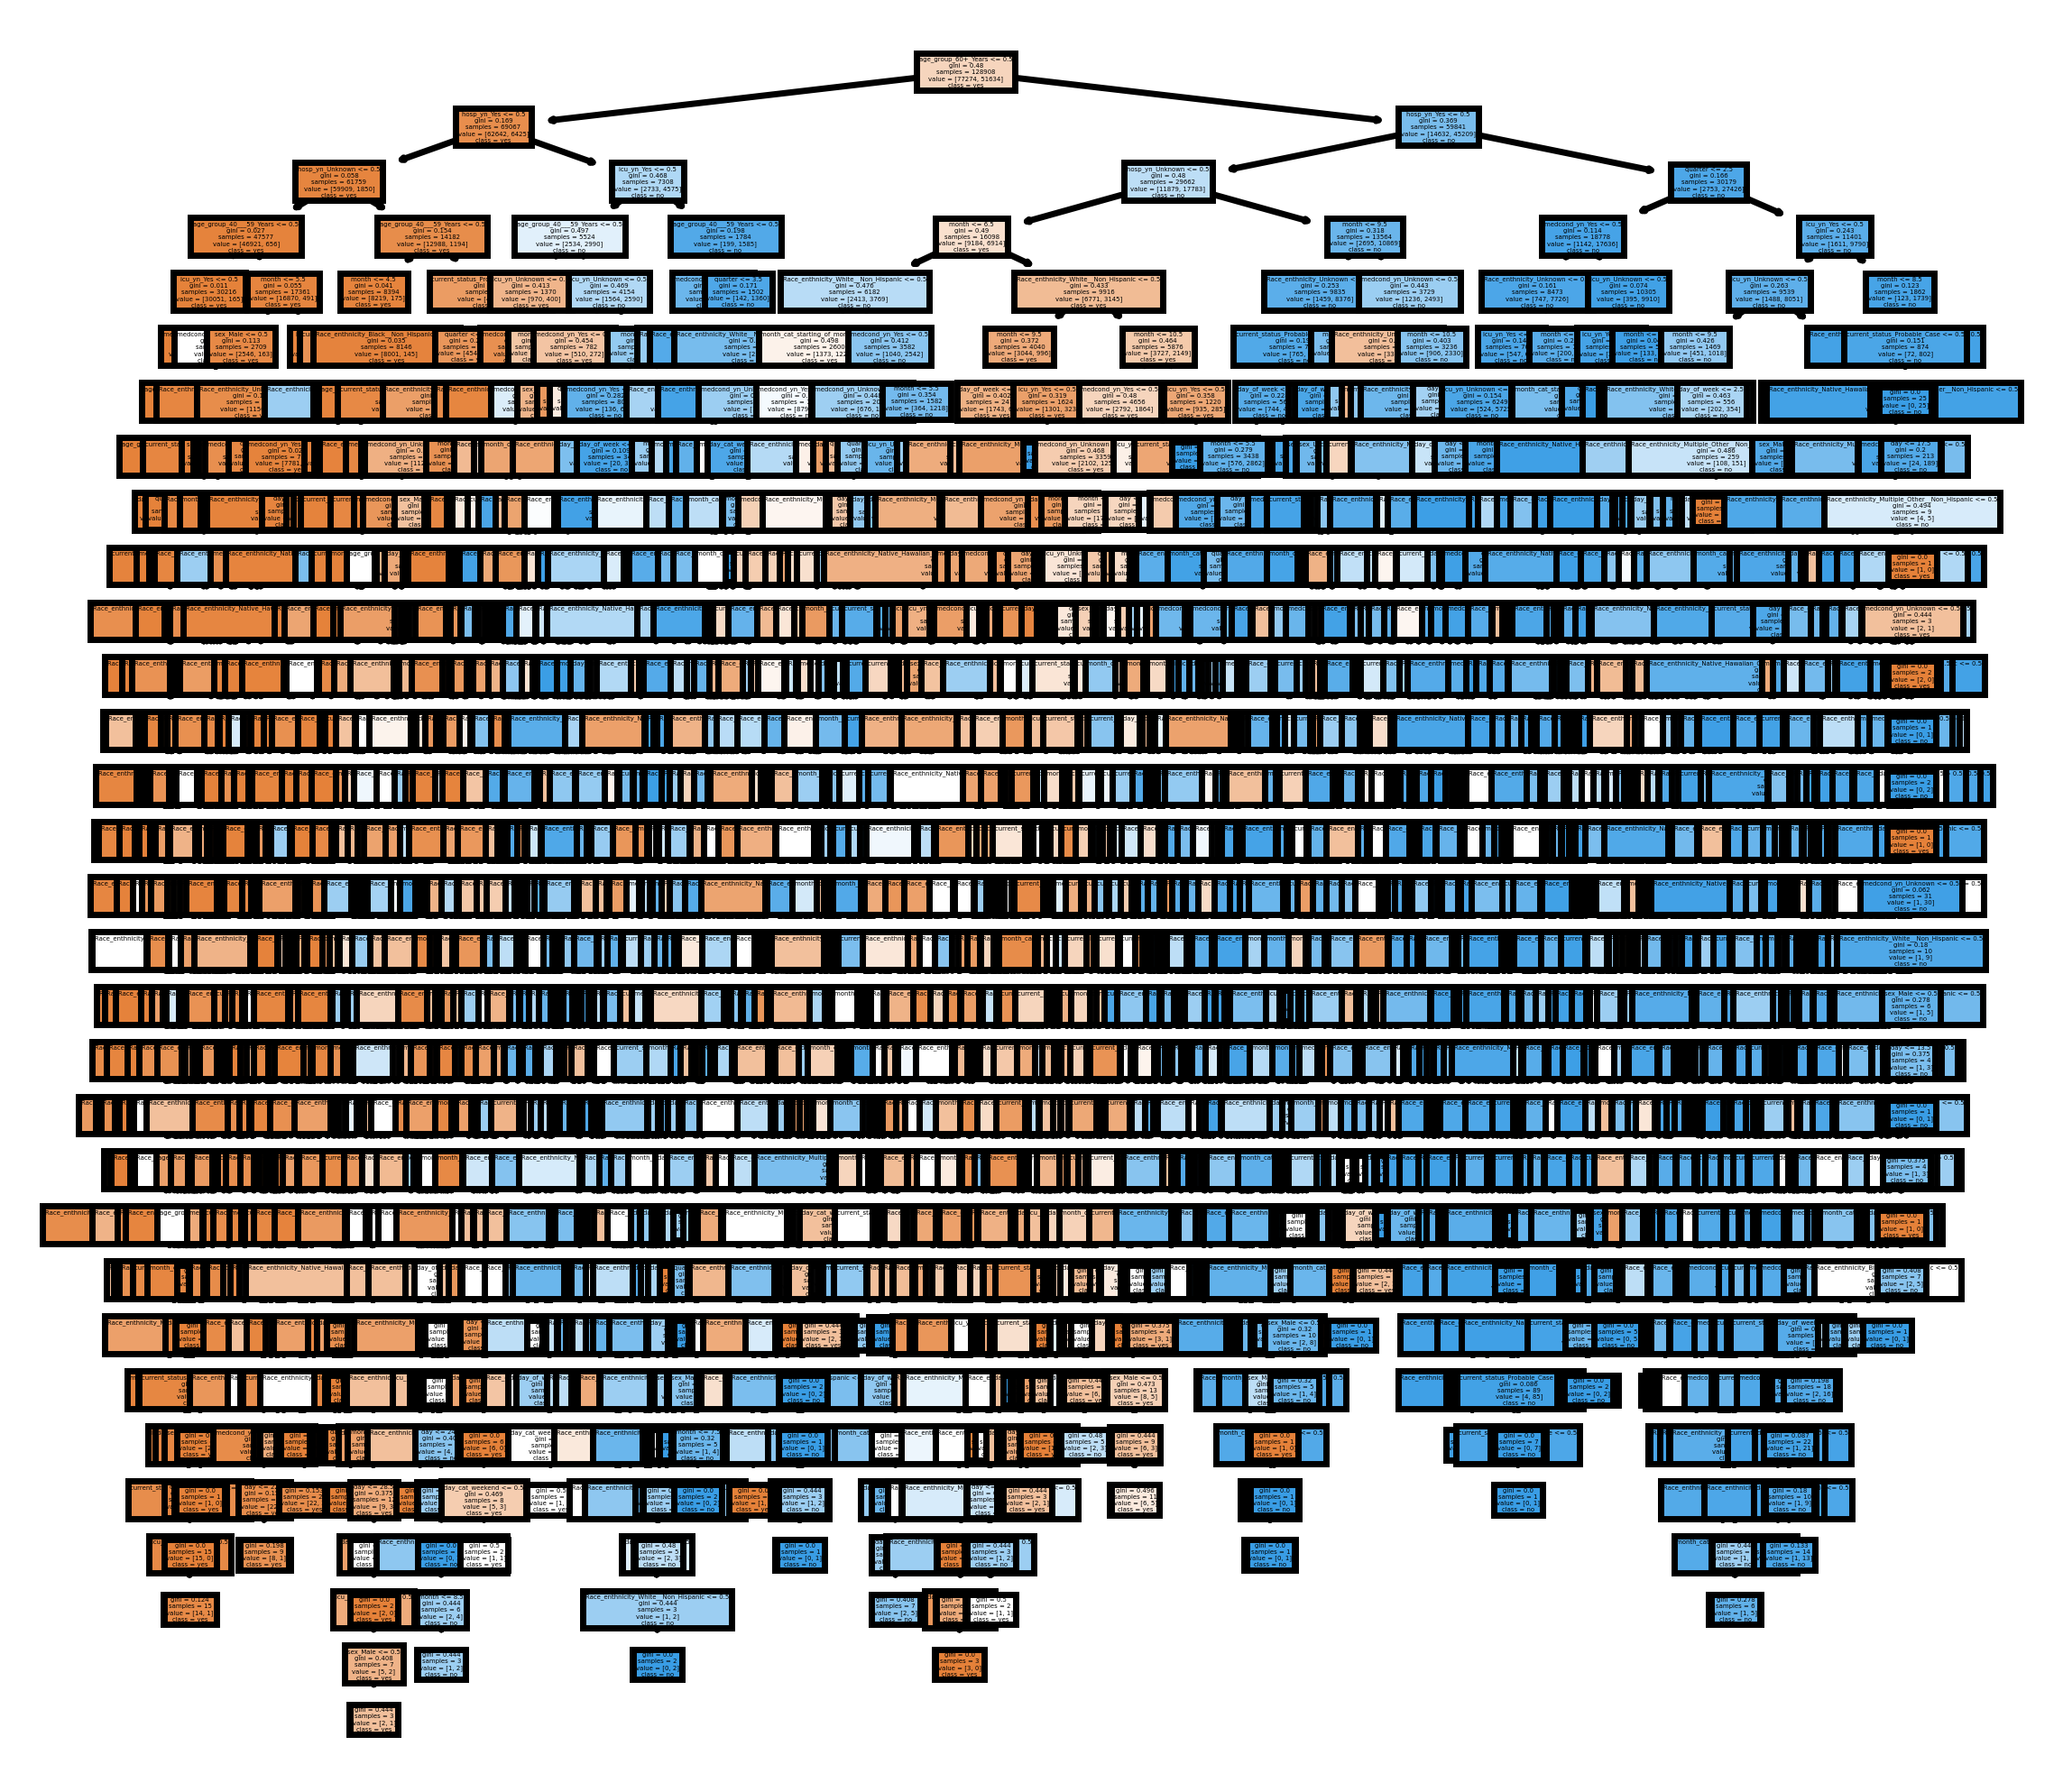

In [74]:
from sklearn.tree import plot_tree
fn=x_train.columns
cn=['yes','no']

# setting dpi = 300 to make image clearer than default 
fig, axes=plt.subplots(nrows = 1, ncols = 1, figsize = (5,5), dpi=500)

dt_plot=plot_tree(dt,
                  feature_names = fn,
                  class_names = cn,
                  filled=True);

### Grid Search and Random Search

#### Gris Search : Parameter tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

params={
    'criterion': ['gini','entropy'],
    'max_depth': [5,7,9,10,11],
    'min_samples_split': [10,15,20,50,100,200,250],
    'min_samples_leaf': [5,10,15,20,50,80,100]}

dtg=DecisionTreeClassifier()

gd_search=GridSearchCV(estimator=dtg, param_grid=params, cv=10, n_jobs=-1, verbose=2)

gd_search.fit(x_train, y_train)

Fitting 10 folds for each of 490 candidates, totalling 4900 fits
